# Laboratorium 1.
## Arytmetyka komputerowa

### Zadanie 1. Sumowanie liczb pojedynczej precyzji

*Python lubi robić śmieszne z liczbami zmiennoprzecinkowymi więc użyjemy floatów z numpy (Jako, że NumPy to wrapper do biblioteki napisanej w C obliczenia na niej powinny być bliższe typowemu zachowaniu*


In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np

v = np.float32(0.31244124124121241242)
#v = np.float32(0.53125)
N = 10**7

#### Zadanie 1.1 do 1.3

prosty kod sumujący N razy liczbe v, a następnie porównujący do wartości która powinna się pojawić (obliczona po przez proste mnożenie)

Wyliczone błędy: 
Bezwzględny: 414697.29820251465
Względny: 13.272809687796054%
Czas trwania: 1.2729289531707764 sekund


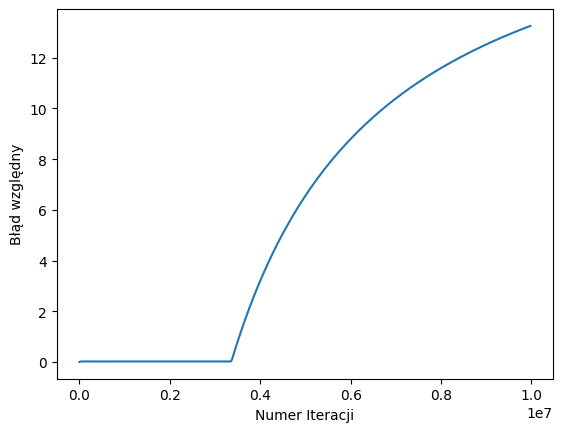

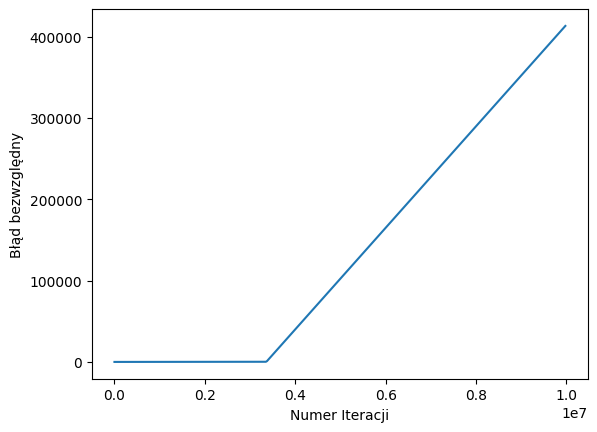

In [4]:
start = time.time()
res = np.float32(0)
P = []
P_Bez = []
P_Wzgl = []
for i in range(N):
  if i % 25000 == 1:
    P.append(i)
    P_Bez.append(abs(res - v*i))
    P_Wzgl.append(abs(res - v*i)/(v*i)*100)
  res += v
end = time.time()

#wykresy
fig, ax = plt.subplots()
ax.plot(P,P_Wzgl)
ax.set_xlabel("Numer Iteracji")
ax.set_ylabel("Błąd względny")

fig2, ax2 = plt.subplots()
ax2.plot(P,P_Bez)
ax2.set_xlabel("Numer Iteracji")
ax2.set_ylabel("Błąd bezwzględny")

print("Wyliczone błędy: ")

print("Bezwzględny: " + str(abs(res - v*N)))
print("Względny: " + str(abs(res - v*N)/(v*N)*100) + "%")
print("Czas trwania: " + str(end-start) + " sekund")

#### Zadanie 1.4-1.7

In [5]:
def rekursja(N):
  T = [v for _ in range(N)]
  def inside(T):
    if len(T) == 1:
      return T[0]
    else: 
       return np.float32(inside(T[0:len(T)//2]) + inside(T[len(T)//2:len(T)]))
  
  return (inside(T)) 

start = time.time()
res = rekursja(N)
end = time.time()


print("Wyliczone błędy: ")

print("Bezwzględny: " + str(abs(res - v*N)))
print("Względny: " + str(abs(res - v*N)/(v*10**7)*100) + "%")
print("Czas trwania: " + str(end-start) + " s")

Wyliczone błędy: 
Bezwzględny: 0.2982025146484375
Względny: 9.544275408850313e-06%
Czas trwania: 7.3804991245269775 s


Jak widać, **błąd względny** spadł o około 6 rzędów wielkości. Jest to spowodowane najprawdopodobniej brakiem potrzeby sprowadzania do wspólnej cechy 

**Czas** natomiast wzrósł dwukrotnie, co jest związane z zwiększeniem złożoności algorytmu z O(N) do O(nlogn)

Dla wartości proponowanej *v = 0.53125* wynik wychodzi zerowy, dlatego zaproponowałem dużo bardziej rozbudowaną liczbe: *v = 0.31244124124121241242*

### Zadanie 2. Algorytm Kahana

poniżej proponuje implementacje algorytmu sumowania Kahana w języku Python

In [6]:
def khan(N):
  T = [v for _ in range(N)]
  sum = np.float32(0.0)
  err = np.float32(0.0)
  for i in range(N):
    y = np.float32(T[i] - err)
    temp = np.float32(sum + y)
    err = np.float32((temp - sum) - y)
    sum = temp
  return sum

start = time.time()
res = khan(N)
end = time.time()

print("Bezwzględny: " + str(abs(res - v*N)))
print("Względny: " + str(abs(res - v*N)/(v*10**7)*100) + "%")
print("Czas trwania: " + str(end-start) + " s")

Bezwzględny: 0.0482025146484375
Względny: 1.5427706092492524e-06%
Czas trwania: 9.846812009811401 s


*Notka: przez konwersje na np.float32 czas nie jest adekwatnie mierzony*

Algorytm ten jest lepszy ponieważ tak samo jak przy naiwnym dodawaniu, wykonujemy cały algorytm w czasie liniowym. 
**Znacznie lepsze** własności numeryczne możemy zawdzięczyć zmiennej err, ponieważ (najprawdopobniej) w wyrażeniu ***err = (temp - sum) - y*** odzyskujemy dokładnośc którą utracilismy przez sprowadzanie sumy i kolejnego elementu tablicy do wspólnej cechy 

### Zadanie 3. Sumy częściowe

In [7]:
def f32Dzeta(s,n):
  sum = np.float32(0)
  for i in range(1,n+1):
    sum += np.float32(1/np.float32(i ** s))
  return sum

def f64Dzeta(s,n):
  sum = np.float64(0)
  for i in range(1,n+1):
    sum += np.float64(1/np.float64(i ** s))
  return sum

def f32DzetaRev(s,n):
  sum = np.float32(0)
  for i in range(n,0,-1):
    sum += np.float32(1/np.float32(i ** s))
  return sum

def f64DzetaRev(s,n):
  sum = np.float64(0)
  for i in range(n,0,-1):
    sum += np.float64(1/np.float64(i ** s))
  return sum

def f32Eta(s,n):
  sum = np.float32(0)
  for i in range(1,n+1):
    sum += np.float32(((-1)**i) * (1/np.float32(i ** s)))
  return sum

def f64Eta(s,n):
  sum = np.float64(0)
  for i in range(1,n+1):
    sum += np.float64(((-1)**i) * (1/np.float64(i ** s)))
  return sum

def f32EtaRev(s,n):
  sum = np.float32(0)
  for i in range(n,0,-1):
    sum += np.float32(((-1)**i) * (1/np.float32(i ** s)))
  return sum

def f64EtaRev(s,n):
  sum = np.float64(0)
  for i in range(n,0,-1):
    sum += np.float64(((-1)**i) * (1/np.float64(i ** s)))
  return sum

S = [2,3.6667,5,7.2,10]
N = [50,100,200,500,1000]

print("===========Dzeta============")
for s in S:
  for n in N:
    print("n = " , str(n) , "; s = " , str(s))
    print("f32: " + str(f32Dzeta(s,n)))
    print("f64: " + str(f64Dzeta(s,n)))
    print("f32 wstecz: " + str(f32DzetaRev(s,n)))
    print("f64 wstecz: " + str(f64DzetaRev(s,n)))

print("===========ETA===============")
for s in S:
  for n in N:
    print("n = " , str(n) , "; s = " , str(s))
    print("f32: " + str(f32Eta(s,n)))
    print("f64: " + str(f64Eta(s,n)))
    print("f32 wstecz: " + str(f32EtaRev(s,n)))
    print("f64 wstecz: " + str(f64EtaRev(s,n)))
  

===========Dzeta============
n =  50 ; s =  2
f32: 1.6251329
f64: 1.625132733621529
f32 wstecz: 1.6251327
f64 wstecz: 1.6251327336215293
n =  100 ; s =  2
f32: 1.634984
f64: 1.6349839001848923
f32 wstecz: 1.6349839
f64 wstecz: 1.634983900184893
n =  200 ; s =  2
f32: 1.6399467
f64: 1.6399465460149971
f32 wstecz: 1.6399465
f64 wstecz: 1.6399465460149973
n =  500 ; s =  2
f32: 1.642936
f64: 1.642936065514894
f32 wstecz: 1.642936
f64 wstecz: 1.6429360655148941
n =  1000 ; s =  2
f32: 1.6439348
f64: 1.6439345666815615
f32 wstecz: 1.6439345
f64 wstecz: 1.6439345666815597
n =  50 ; s =  3.6667
f32: 1.1093994
f64: 1.1093997551541945
f32 wstecz: 1.1093998
f64 wstecz: 1.1093997551541943
n =  100 ; s =  3.6667
f32: 1.1094086
f64: 1.1094087973421474
f32 wstecz: 1.1094089
f64 wstecz: 1.1094087973421476
n =  200 ; s =  3.6667
f32: 1.1094086
f64: 1.1094102423332313
f32 wstecz: 1.1094103
f64 wstecz: 1.109410242333231
n =  500 ; s =  3.6667
f32: 1.1094086
f64: 1.1094104908440712
f32 wstecz: 1.1094105


### Zadanie 4. Błędy zaokrągleń i odwzorowanie logistyczne

dany mamy wzór rekurencyjny odwzorowania logistycznego:
 $$x_{n+1}=rx_n(1-x_n)$$
Gdzie $x_n \in [0,1]$ i $r > 0$

problem będzie rozwiązywany poprzez funkcje *logisticMap(N,x0,R)*

In [8]:
def logisticMap(N,x0,R):
  Y = []
  for r in R:
    m = x0
    for _ in range(N):
      m = np.float32((r*m)*(1-m))
    Y.append(m)
  return Y

def logisticMap64(N,x0,R):
  Y = []
  for r in R:
    m = x0
    for _ in range(N):
      m = np.float64((r*m)*(1-m))
    Y.append(m)
  return Y


#### Podpunkt a

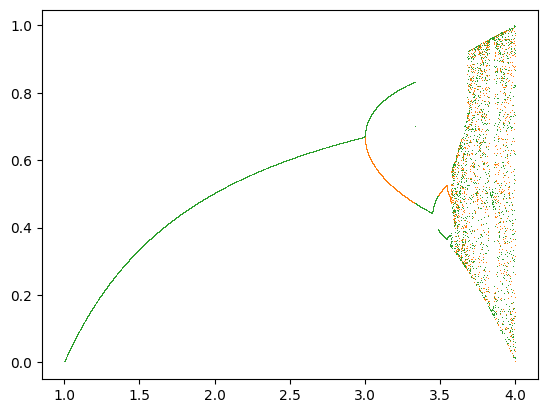

In [11]:
R=np.linspace(1,4,10000)
N = 1000

plt.plot(R, logisticMap(N,0.3,R), ls='', marker=','); #semicolon somehow surpresses the output text
plt.plot(R,logisticMap(N,0.5,R), ls='', marker=','); #man I love python
plt.plot(R,logisticMap(N,0.7,R), ls='', marker=',');

Można zauważyć w okolicach 3.0 klasyczne "rozdzielenie" wyników, związane z odwzorowaniem logistycznym

#### Podpunkt b

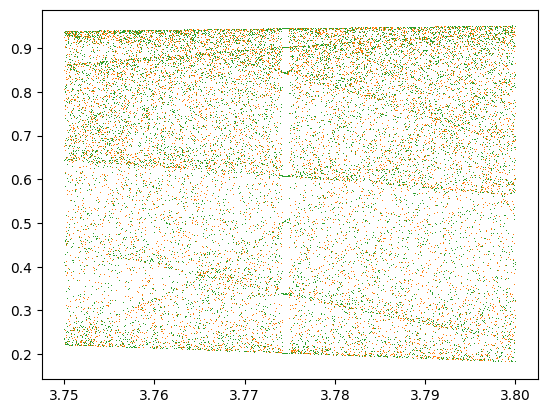

In [13]:
R=np.linspace(3.75,3.8,10000)
N = 1000


plt.plot(R, logisticMap(N,0.3,R), ls='', marker=',');
plt.plot(R,logisticMap(N,0.5,R), ls='', marker=',');
plt.plot(R,logisticMap(N,0.7,R), ls='', marker=',');

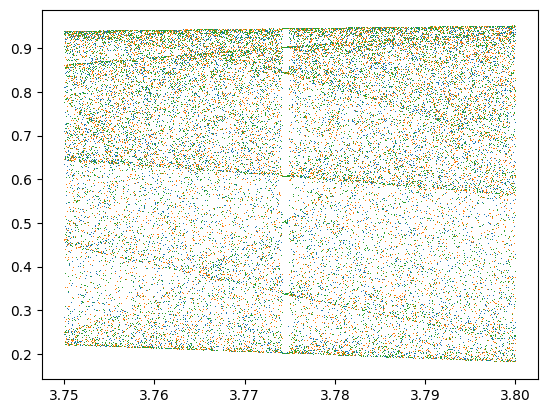

In [14]:
R=np.linspace(3.75,3.8,10000)
N = 1000


plt.plot(R, logisticMap64(N,0.3,R), ls='', marker=',');
plt.plot(R,logisticMap64(N,0.5,R), ls='', marker=',');
plt.plot(R,logisticMap64(N,0.7,R), ls='', marker=',');

Przy podwójnej precyzji wyniki nie wpadają w "dziury" tylko są bardziej rozłożone

#### Podpunkt c

w celu wykonania tego zadania zmienie kod dla pojedyńczej precyzji aby wyliczał iteracje potrzebne do osiągnięcia zera

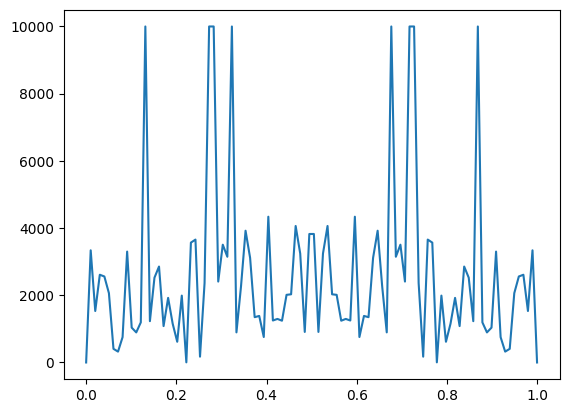

In [15]:
def logisticMapIteration(N,X,r = 4):
  Y = []
  for x in X:
    m = x
    for n in range(N):
      m = np.float32((r*m)*(1-m))
      if(m == 0):
        break
    Y.append(n)
  return Y


N = 10**4

X = np.linspace(0,1,100)
plt.plot(X,logisticMapIteration(N,X)); 

Na podstawie tego i dodatkowego testu (wykonanego na podwójnej precyzji) nie testujemy po ilu iteracjach osiągniemy 0, tylko po ilu iteracjach osiągniemy underflow. Wyniki znajdują się w okolicach do 4 tysięcy, natomiast dla niektórych wartości $x_0$ osiągamy wyniki powyżej $10^6$ iteracji (wykres kończy się tylko na $10^5$, lecz po dodatkowych testach ustawienie N na $10^6$ dało ten sam, lecz spłaszczony wykres)

## materiały użyte do zrozumienia dodatkowego zadania

https://en.wikipedia.org/wiki/Logistic_map

https://en.wikipedia.org/wiki/Bifurcation_theory

https://www.youtube.com/watch?v=ovJcsL7vyrk
